# **Matplotlib**

Official Documentation: [Matplotlib_documentation](https://matplotlib.org/stable/tutorials/index.html)

Matplotlib is a comprehensive python library for creating static, animated, and interactive visualizations.

Installing libraries:
* Using pip
    - `pip install matplotlib`
* Using uv
    - `uv add matplotlib`

## **Pyplot** in Matplotlib

matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.  
In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current Axes (please note that we use uppercase Axes to refer to the Axes concept, which is a central part of a figure and not only the plural of axis).

### **Loading the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Datasets Download links:
* 

In [ ]:
# datasets loading

tips = pd.read_csv('./datasets/tip.csv')
titanic = pd.read_csv('./datasets/Titanic-Dataset.csv')
athletes = pd.read_csv('./datasets/athlete_events.csv')

In [3]:
tips.head(3)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

In [4]:
titanic.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [5]:
athletes.head(3)

ID                 Name Sex   Age  Height  Weight     Team  NOC  \
0   1            A Dijiang   M  24.0   180.0    80.0    China  CHN   
1   2             A Lamusi   M  23.0   170.0    60.0    China  CHN   
2   3  Gunnar Nielsen Aaby   M  24.0     NaN     NaN  Denmark  DEN   

         Games  Year  Season       City       Sport  \
0  1992 Summer  1992  Summer  Barcelona  Basketball   
1  2012 Summer  2012  Summer     London        Judo   
2  1920 Summer  1920  Summer  Antwerpen    Football   

                          Event Medal  
0   Basketball Men's Basketball   NaN  
1  Judo Men's Extra-Lightweight   NaN  
2       Football Men's Football   NaN

In [6]:
print(f"shape of the tips data is: {tips.shape}")
print(f"shape of titanic data is: {titanic.shape}")
print(f"shape of athletes_olympics data is: {athletes.shape}")

shape of the tips data is: (244, 7)
shape of titanic data is: (891, 12)
shape of athletes_olympics data is: (271116, 15)


### **Default x axis**

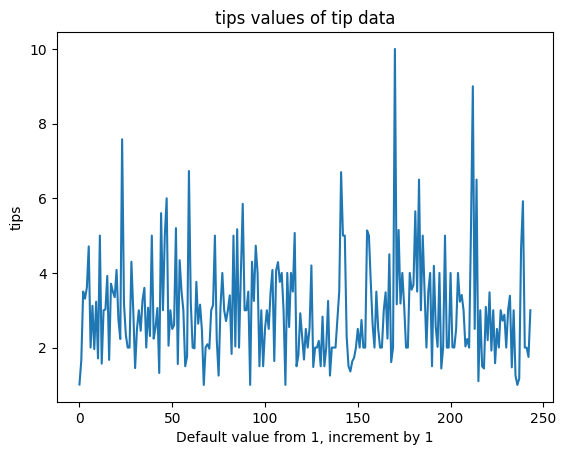

In [7]:
# if we wont mention x axis data, by deafault matplotlib considers from value 1 and treats the provided as y-axis data

plt.plot(tips['tip']) # not mentioning any axis
plt.title('tips values of tip data')
plt.xlabel('Default value from 1, increment by 1')
plt.ylabel('tips')
plt.show()

From above data
* total data is approximately 250 rows
* max value of tip is approximately 10
* min valueof tip is approximately 0
* The trend of tip is not linear or constant

### **Plot with x axis data points**

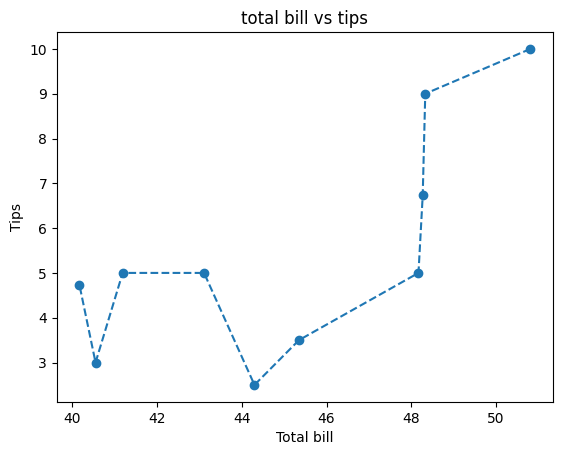

In [8]:
top_10_bills = tips.sort_values('total_bill',ascending=False)[:10]

plt.plot(top_10_bills['total_bill'],top_10_bills['tip'], marker = 'o', linestyle = '--') # providing both x-axis and y-axis
plt.title('total bill vs tips')
plt.xlabel('Total bill')
plt.ylabel('Tips')
plt.show()

### **Scatter plot**

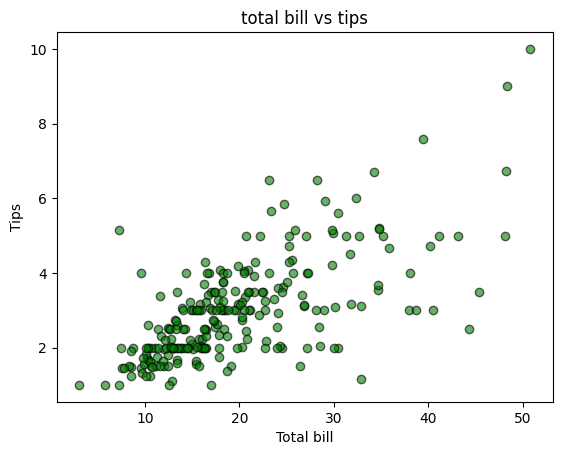

In [9]:
plt.scatter(tips['total_bill'], tips['tip'], alpha=0.6, facecolor = 'g', edgecolor = 'k') # alpha is used for transparency of points
plt.title('total bill vs tips')
plt.xlabel('Total bill')
plt.ylabel('Tips')
plt.show()

### **Setting ticks manually**

We can set the values of the ticks manually

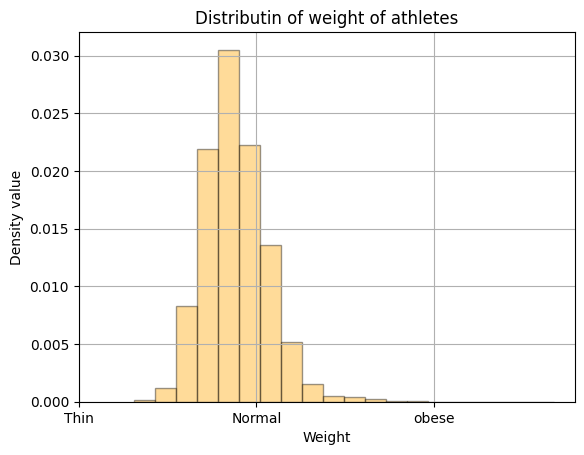

In [10]:
# distribution of weight in olympics data

plt.hist(athletes['Weight'], 20, density=True, facecolor = 'orange', edgecolor = 'black', alpha = 0.4)
plt.title('Distributin of weight of athletes')
plt.xlabel('Weight')
plt.ylabel('Density value')
plt.grid(True)
plt.xticks(np.arange(0, 200, 80), ['Thin', 'Normal', 'obese'])
# also set plt.yticks manually

plt.show()

### **twinx()**

It creates a invisible x_axis, y_axis on the called axis

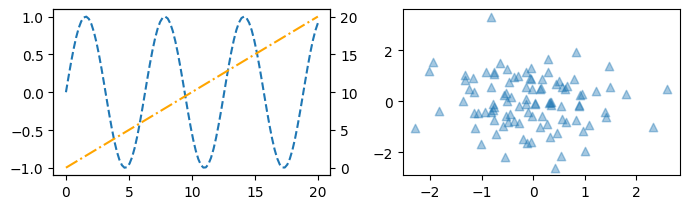

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7, 2.2))

x = np.linspace(0,20,100)
ax1.plot(x, np.sin(x), ls = '--')
ax3 = ax1.twinx()
ax3.plot(x,x, ls = '-.', c = 'orange')

ax2.scatter(np.random.randn(100), np.random.randn(100), marker='^', alpha=0.4)
plt.tight_layout()
plt.show()

### **pcolormesh(),  contourf()**

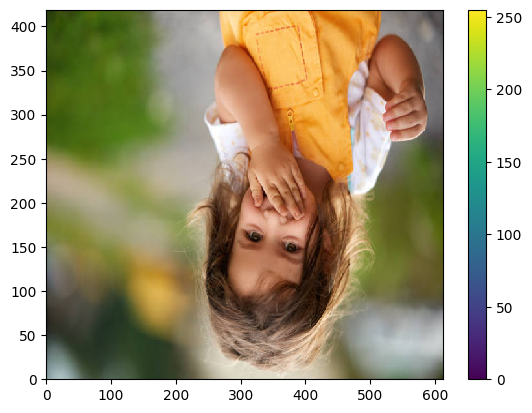

In [12]:
# generally pcolormesh() starts the (0,0) from left bottom
# imshow() starts the (0,0) from left top

from PIL import Image

girl = Image.open('girl.jpg')
plt.pcolormesh(np.array(girl))
plt.colorbar()
plt.show()

In [13]:
# countourf

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)*2
X, Y = np.meshgrid(x,y)

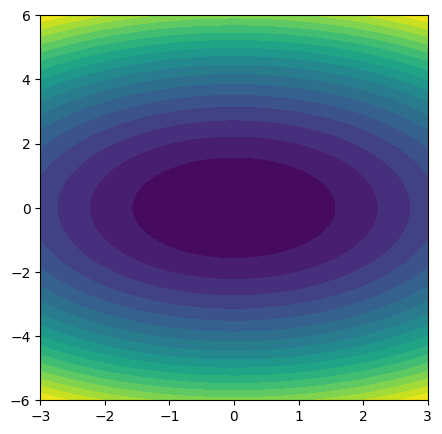

In [14]:
plt.figure(figsize=(5,5))
plt.contourf(X,Y, X**2 + Y**2, levels = 20)
plt.show()

### **plt.aspect()**

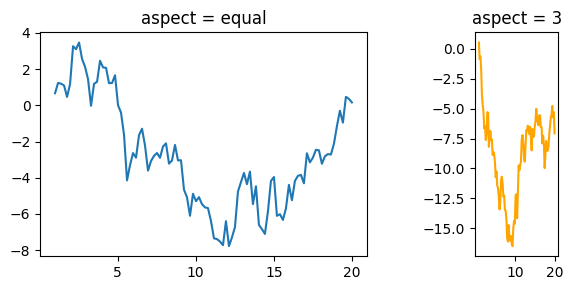

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (7, 3))
ax1.plot(np.linspace(1,20,100),np.cumsum(np.random.randn(100)))
ax1.set_title('aspect = equal')

ax2.plot(np.linspace(1,20,100), np.cumsum(np.random.randn(100)), c = 'orange')
ax2.set_aspect(3)
ax2.set_title('aspect = 3')

plt.tight_layout()
plt.show()

We can observe that, as the total bill increases, there is a positive growth in tips as well

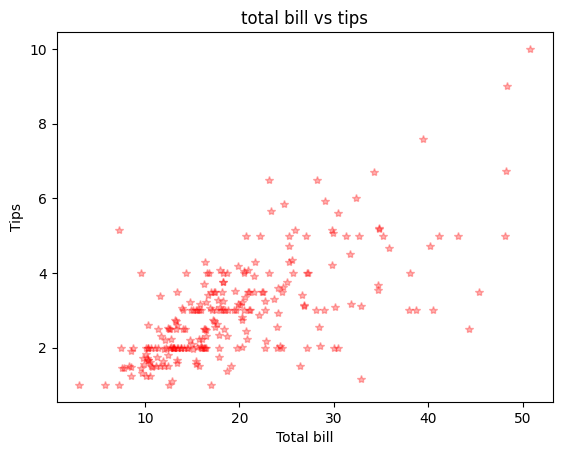

In [16]:
# we can also plot by using plot function
# in r* -- red, star_style for each point
plt.plot(tips['total_bill'], tips['tip'], 'r*', alpha = 0.3) # alpha is used for transparency of points
plt.title('total bill vs tips')
plt.xlabel('Total bill')
plt.ylabel('Tips')
plt.show()

### **Formattings in plots**

100


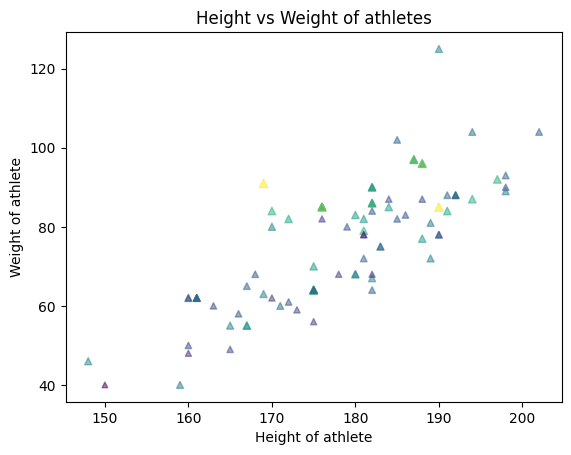

In [17]:
# includig the sizes, color

athletes_50_data = athletes.dropna()[:100]
print(len(athletes_50_data))
plt.scatter(athletes_50_data['Height'], athletes_50_data['Weight'], marker='^', alpha=0.5, c= athletes_50_data['Age'], s= athletes_50_data['Age'])
plt.title('Height vs Weight of athletes')
plt.xlabel('Height of athlete')
plt.ylabel('Weight of athlete')
plt.show()

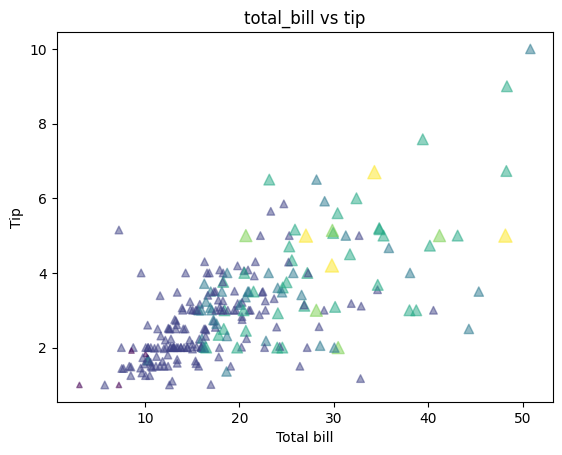

In [18]:
plt.scatter(tips['total_bill'], tips['tip'], marker='^', alpha=0.5, c= tips['size'], s= tips['size']*15)
plt.title('total_bill vs tip')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

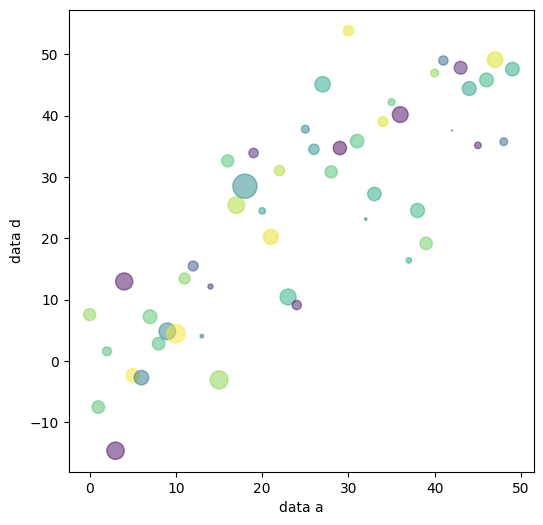

In [19]:
# A numpy example for clearly visualizing the sizes and colors

a = np.arange(50)
b = np.random.randint(0, 50, 50)
c = np.random.randn(50)

d = a + 10*np.random.randn(50)
e = np.abs(c)*100

plt.figure(figsize=(6,6))
plt.scatter(a, d, c = b, s = e, alpha=0.5)
plt.xlabel('data a')
plt.ylabel('data d')
plt.show()

### **Multiple line plots in one plot**

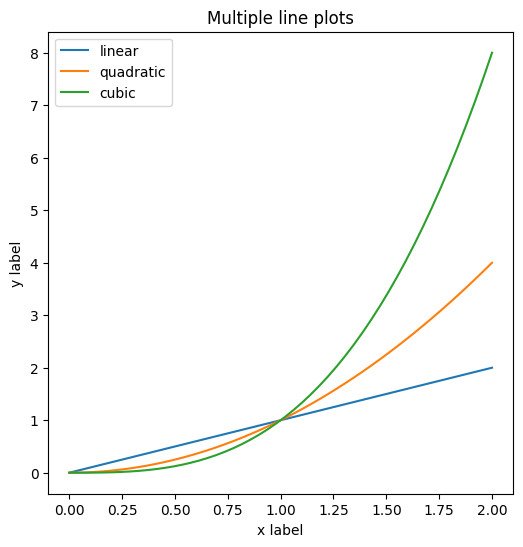

In [20]:
x = np.linspace(0, 2, 50)
plt.figure(figsize=(6,6))
plt.plot(x,x, label = 'linear')
plt.plot(x, x**2, label = 'quadratic')
plt.plot(x, x**3, label = 'cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Multiple line plots')
plt.legend()
plt.show()

In [21]:
female = tips[tips['sex'] == 'Female'].sort_values('total_bill', ascending=False)[:20]
male = tips[tips['sex'] == 'Male'].sort_values('total_bill', ascending=False)[:20]

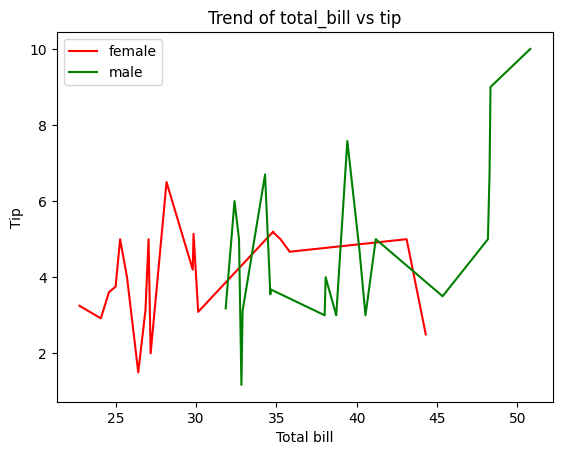

In [22]:
# line plot of top 20 female total bills vs tips
# line plot of top 20 male total bills vs tips

plt.plot(female['total_bill'], female['tip'], c = 'r', label = 'female')
plt.plot(male['total_bill'], male['tip'], c = 'g', label = 'male')
plt.legend()
plt.title('Trend of total_bill vs tip')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

#### Using **plt.subplot()**

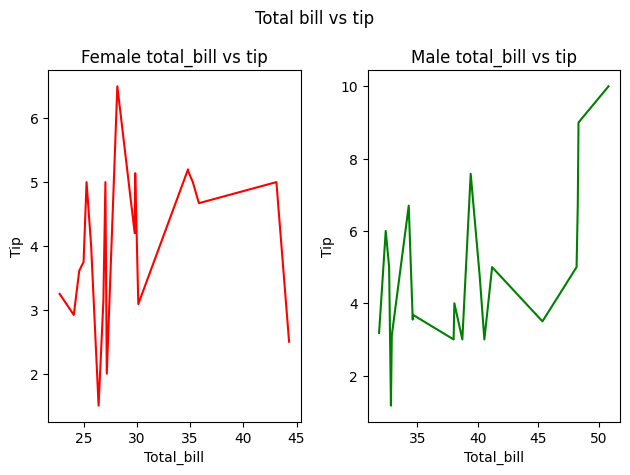

In [23]:
# Viewing plots seperately

plt.subplot(1, 2, 1)
plt.plot(female['total_bill'], female['tip'], c = 'r')
plt.title('Female total_bill vs tip')
plt.xlabel('Total_bill')
plt.ylabel('Tip')

plt.subplot(1, 2, 2)
plt.plot(male['total_bill'], male['tip'], c = 'g')
plt.title('Male total_bill vs tip')
plt.xlabel('Total_bill')
plt.ylabel('Tip')

plt.suptitle('Total bill vs tip')

plt.tight_layout()
plt.show()

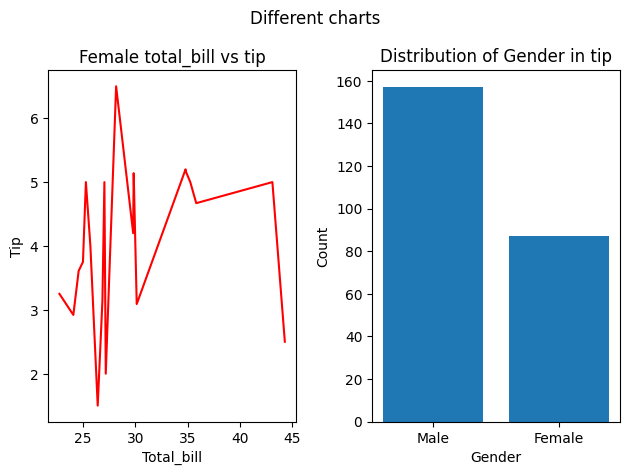

In [24]:
# we can also draw multiple kinds of plots, not only same plot

tip_gender_count = tips['sex'].value_counts().reset_index()

plt.subplot(1, 2, 1)
plt.plot(female['total_bill'], female['tip'], c = 'r')
plt.title('Female total_bill vs tip')
plt.xlabel('Total_bill')
plt.ylabel('Tip')

plt.subplot(1, 2, 2)
plt.bar(tip_gender_count['sex'], tip_gender_count['count'])
plt.title('Distribution of Gender in tip')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.suptitle('Different charts')

plt.tight_layout()
plt.show()

#### Using **plt.subplots()**

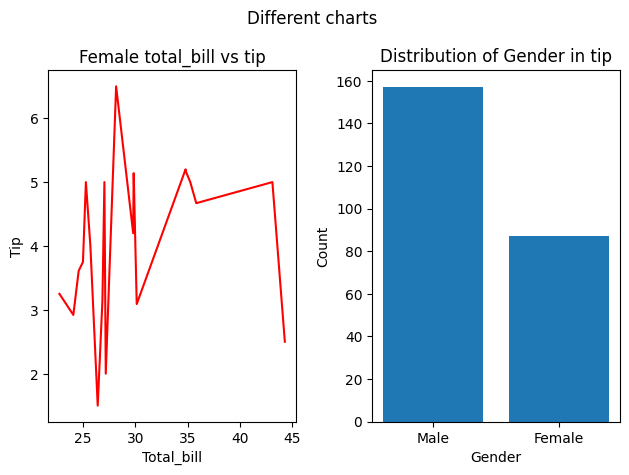

In [25]:
# ax is the axes array

ax = plt.subplots(1,2)[1]

ax[0].plot(female['total_bill'], female['tip'], c = 'r')
ax[0].set_title('Female total_bill vs tip')
ax[0].set_xlabel('Total_bill')
ax[0].set_ylabel('Tip')

ax[1].bar(tip_gender_count['sex'], tip_gender_count['count'])
ax[1].set_title('Distribution of Gender in tip')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Count')

plt.suptitle('Different charts ')
plt.tight_layout()
plt.show()


#### Using **plt.figure()**

plt.figure() creates a new figure window, where we can add plots
* It helps in manual control (like size, background color, border color, DPI)
* Creating multiple plots
* Origanizing multiple plots

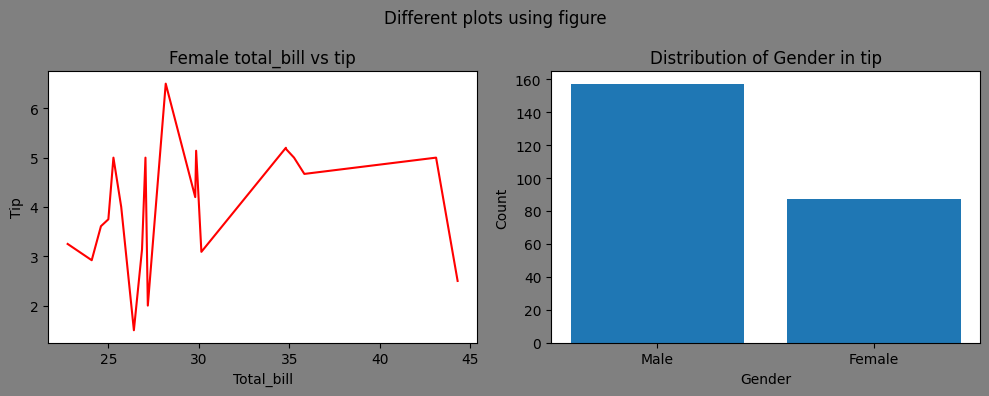

In [26]:
fig = plt.figure(figsize=(10, 4), facecolor='grey')

ax1 = fig.add_subplot(1,2,1)
ax1.plot(female['total_bill'], female['tip'], c = 'r')
ax1.set_title('Female total_bill vs tip')
ax1.set_xlabel('Total_bill')
ax1.set_ylabel('Tip')

ax2 = fig.add_subplot(1,2,2)
ax2.bar(tip_gender_count['sex'], tip_gender_count['count'])
ax2.set_title('Distribution of Gender in tip')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')

plt.suptitle('Different plots using figure')
plt.tight_layout()
plt.show()

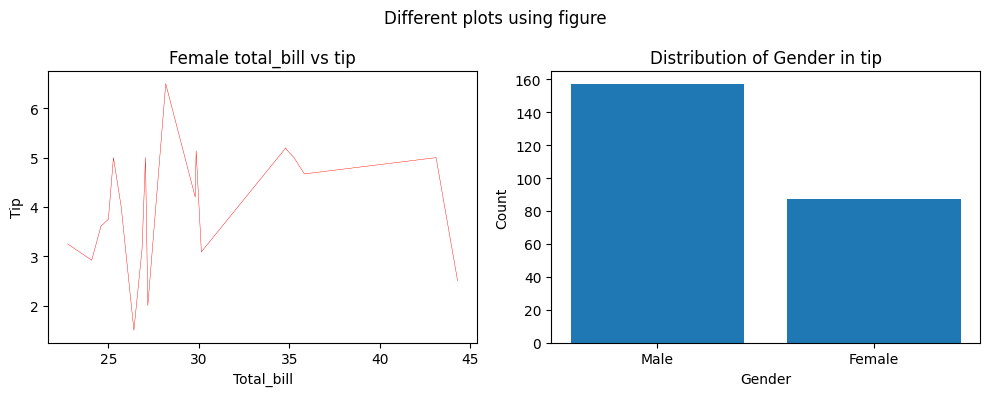

In [27]:
# we can directly use the plt.subplot() in the figure
# used linewidth to control the width of the line in line_plot

fig = plt.figure(figsize=(10, 4), facecolor='white')

plt.subplot(121)
plt.plot(female['total_bill'], female['tip'], c = 'r', linewidth = 0.3)
plt.title('Female total_bill vs tip')
plt.xlabel('Total_bill')
plt.ylabel('Tip')

plt.subplot(122)
plt.bar(tip_gender_count['sex'], tip_gender_count['count'])
plt.title('Distribution of Gender in tip')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.suptitle('Different plots using figure')
plt.tight_layout()
plt.show()


### **Helper** function for plotting

In [28]:
def helper(ax, data1, data2, parm_dict):
    out = ax.plot(data1, data2, **parm_dict)
    return out

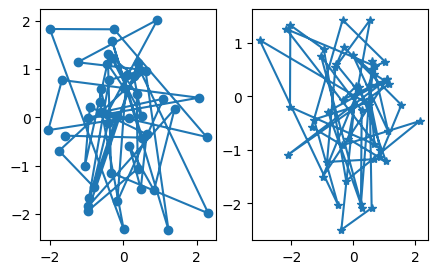

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (5, 3))
data1, data2, data3, data4 = np.random.randn(4, 50)

helper(ax1, data1, data2, {'marker':'o'})
helper(ax2, data3, data4, {'marker':'*'})

In [30]:
a = np.array([1,2,3])
print(np.cumsum(a))

[1 3 6]


### **Controlling the plots using figure()**

Text(0.5, 1.0, 'title for subplot 2')

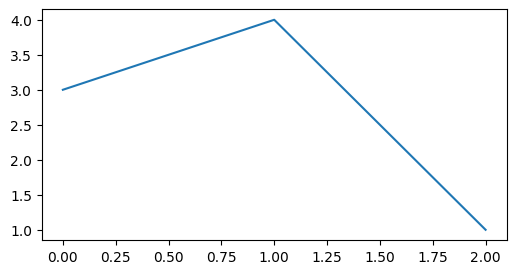

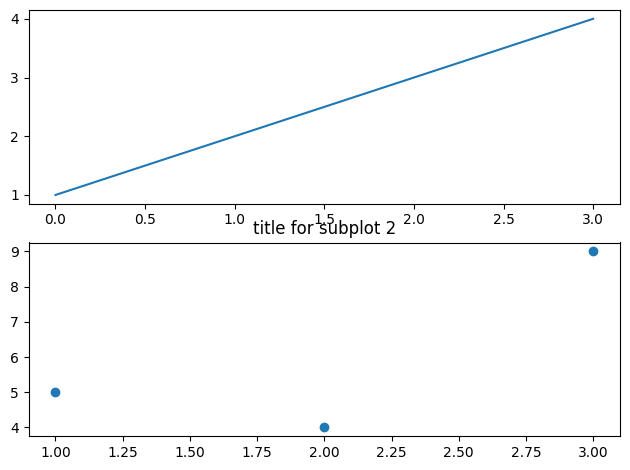

In [31]:
plt.figure(1) # working with first figure

plt.subplot(211) # first subplot in fig 1
plt.plot([1,2,3,4])
plt.subplot(212) # second subplot in fig 1
plt.scatter([1,2,3],[5,4,9])

plt.tight_layout()

plt.figure(figsize=(6,3), num = 2) # working with figure 2
plt.plot([3,4,1]) # plot in the first figure

plt.figure(1) # again using the first figure
plt.subplot(212) # using the first subplot in first figure
plt.title('title for subplot 2')

### **Text** in plots

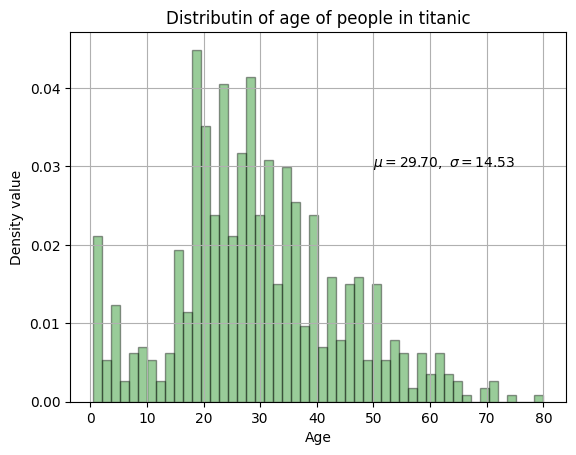

In [32]:
# histogram of Age of titanic dataset

# density - gives probability values instead of counts
# bins - number of bins to be formed
# facecolor - color of the bins
# edgecolor - color of each edge
# alpha - transparency of each bin
# grid - gives the grid
# text - takes 3 values - location (x,y), string (s)


mean_age = titanic['Age'].mean().item()
std_age = titanic['Age'].std().item()

plt.hist(titanic['Age'], 50, density=True, facecolor = 'g', edgecolor = 'black', alpha = 0.4)
plt.title('Distributin of age of people in titanic')
plt.xlabel('Age')
plt.ylabel('Density value')
plt.grid(True)

plt.text(50, 0.03, fr'$\mu={mean_age:.2f},\ \sigma={std_age:.2f}$')
plt.show()

### **Annotate()** for text annotating

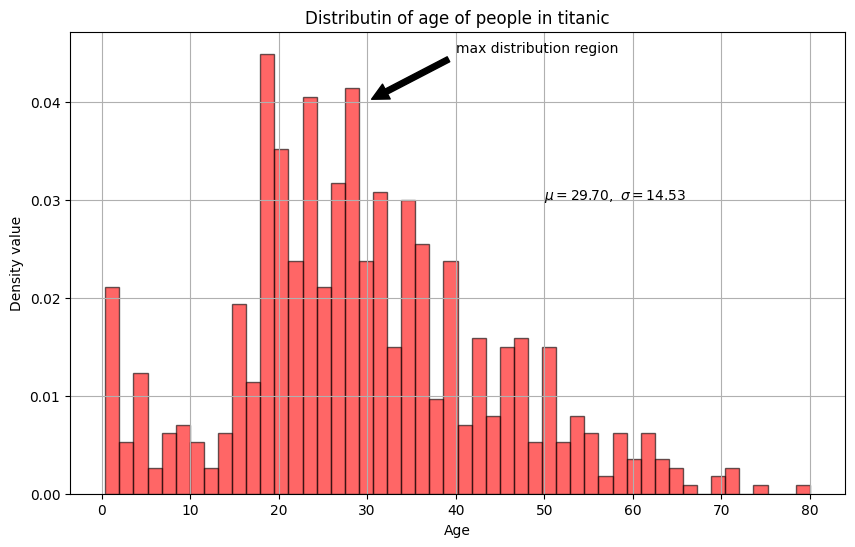

In [33]:
plt.figure(figsize=(10,6))

mean_age = titanic['Age'].mean().item()
std_age = titanic['Age'].std().item()

plt.hist(titanic['Age'], 50, density=True, facecolor = 'r', edgecolor = 'black', alpha = 0.6)
plt.title('Distributin of age of people in titanic')
plt.xlabel('Age')
plt.ylabel('Density value')
plt.grid(True)

plt.text(50, 0.03, fr'$\mu={mean_age:.2f},\ \sigma={std_age:.2f}$')

plt.annotate('max distribution region', xy=(30, 0.04), xytext=(40, 0.045)
             , arrowprops=dict(facecolor = 'black', shrink = 0.05))
plt.show()

## **Image plot**

In [34]:
# read image data

from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

In [35]:
img1 = np.array(Image.open('Posidex_Logo.jpg'))

print(img1.shape)

(558, 1065, 3)


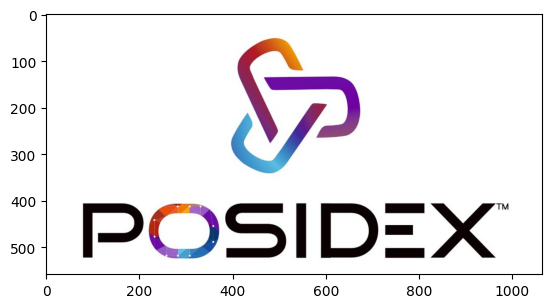

In [36]:
# image showing uing maptlotlb

plt.imshow(img1)
plt.show()

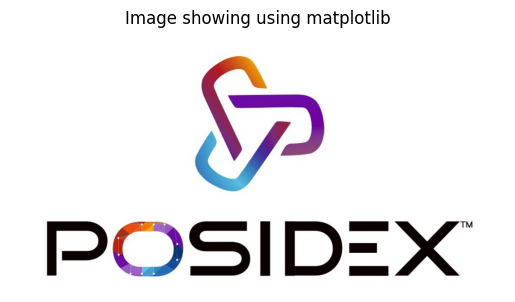

In [37]:
# displaying logo without axis

plt.imshow(img1)
plt.title("Image showing using matplotlib")
plt.axis(False)
plt.show()

Using limiting to clearly observe the pixel data

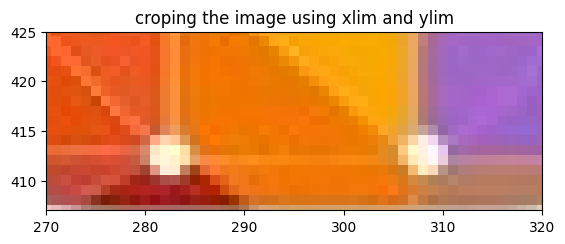

In [38]:
# use xlim, ylim to observe the pixel values

plt.imshow(img1)
plt.xlim(270, 320)
plt.ylim(407, 425)
plt.title('croping the image using xlim and ylim')
plt.show()

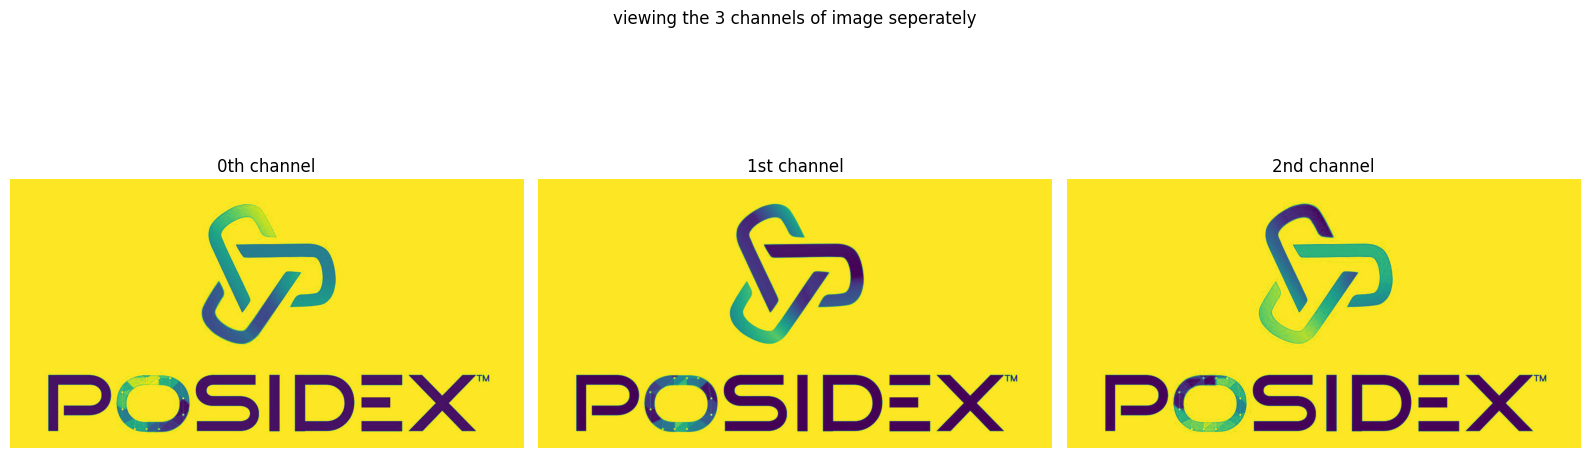

In [39]:
# observing the 3 channels seperately
# default cmap is 'viridis'

plt.figure(figsize=(16,6))

plt.subplot(131)
plt.imshow(img1[:,:,0])
plt.axis(False)
plt.title("0th channel")

plt.subplot(132)
plt.imshow(img1[:,:,1])
plt.axis(False)
plt.title('1st channel')

plt.subplot(133)
plt.imshow(img1[:,:,2])
plt.axis(False)
plt.title('2nd channel')

plt.suptitle("viewing the 3 channels of image seperately")
plt.tight_layout()
plt.show()

Reason behind the colored images, even one channel is passed
* matplotlib has cmap as 'viridis' by default
* so unitil cmap is passed as 'gray', matplotlib applies the viridis colors to the passed 1D image

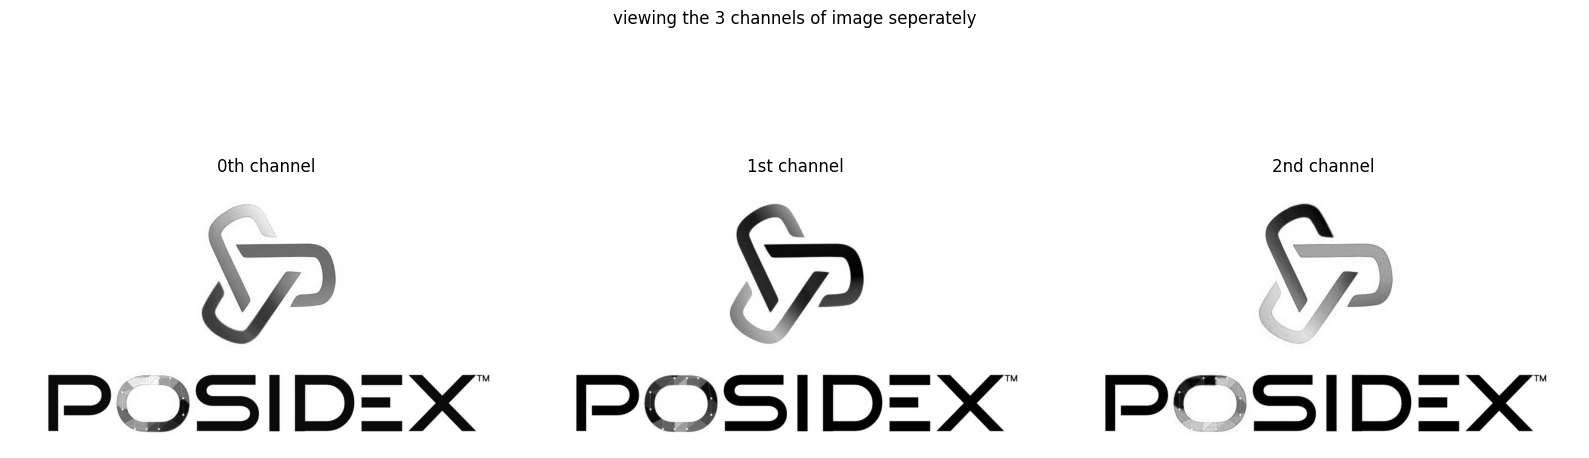

In [40]:
plt.figure(figsize=(16,6))

plt.subplot(131)
plt.imshow(img1[:,:,0], cmap='grey')
plt.axis(False)
plt.title("0th channel")

plt.subplot(132)
plt.imshow(img1[:,:,1], cmap='grey')
plt.axis(False)
plt.title('1st channel')

plt.subplot(133)
plt.imshow(img1[:,:,2], cmap='grey')
plt.axis(False)
plt.title('2nd channel')

plt.suptitle("viewing the 3 channels of image seperately")
plt.tight_layout()
plt.show()

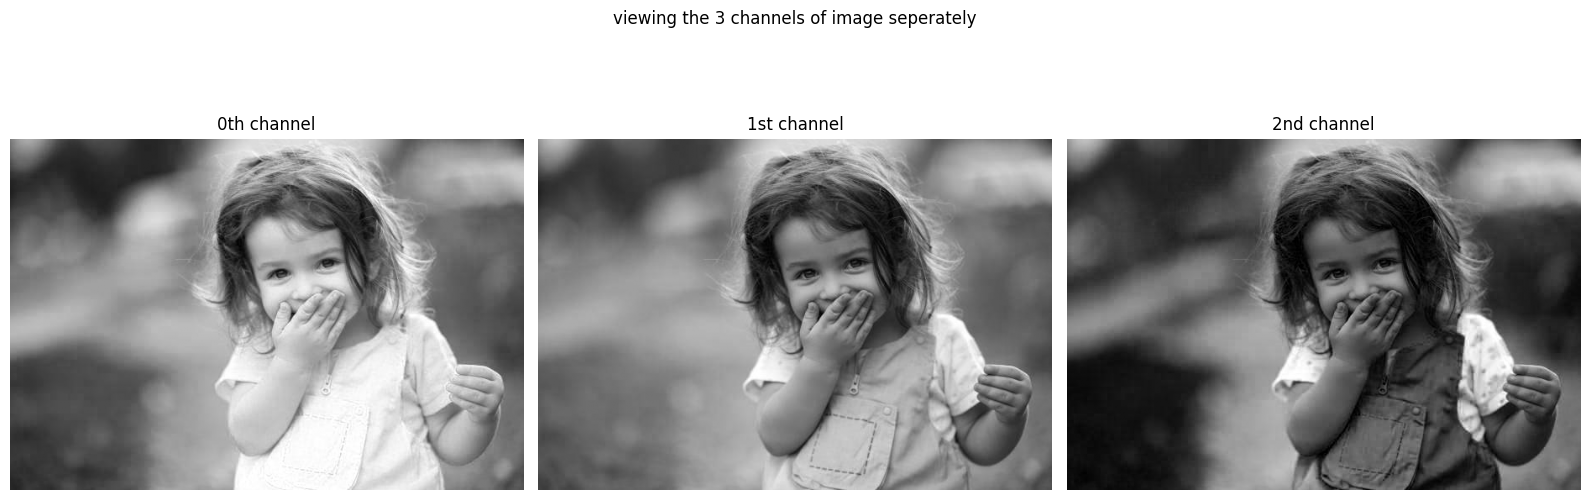

In [41]:
img2 = np.array(Image.open('girl.jpg'))


plt.figure(figsize=(16,6))

plt.subplot(131)
plt.imshow(img2[:,:,0], cmap='grey')
plt.axis(False)
plt.title("0th channel")

plt.subplot(132)
plt.imshow(img2[:,:,1], cmap='grey')
plt.axis(False)
plt.title('1st channel')

plt.subplot(133)
plt.imshow(img2[:,:,2], cmap='grey')
plt.axis(False)
plt.title('2nd channel')

plt.suptitle("viewing the 3 channels of image seperately")
plt.tight_layout()
plt.show()

Color map limiting

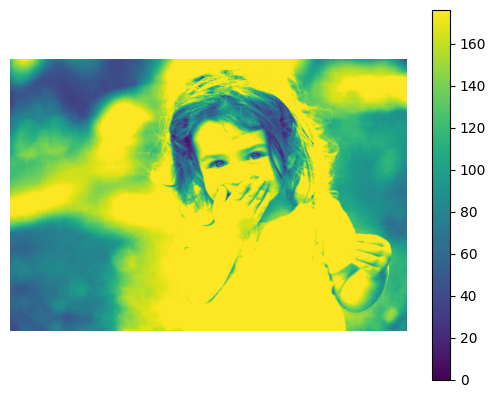

In [42]:
imgplot = plt.imshow(img2[:,:,0])
imgplot.set_clim(0, 176)
plt.colorbar()
plt.axis('off')
plt.show()

### **Thumbnail**


Thumbnail -- used to resize the image

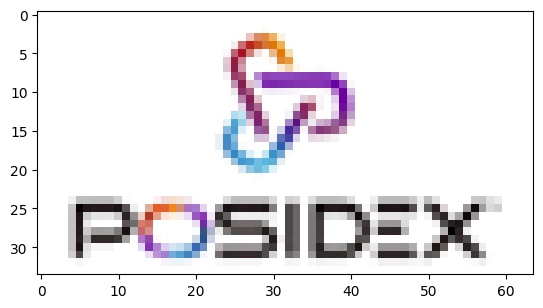

In [43]:
image_1 = Image.open('Posidex_Logo.jpg')
image_1.thumbnail((64, 64)) # for resizing the image

plt.imshow(image_1)
plt.show()

## **Plot types**

### **Pairwise data**

#### **lineplot**

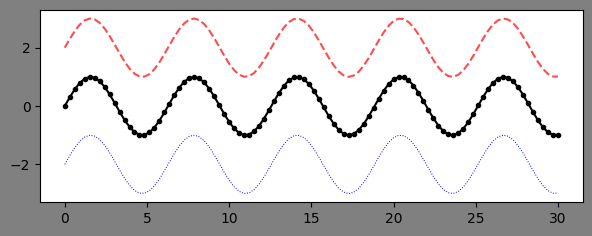

In [44]:
plt.figure(figsize=(7,2.5), facecolor='grey')

x = np.linspace(0, 30, 100)
plt.plot(x, np.sin(x) + 2, c='r', ls = '--', alpha = 0.7)
plt.plot(x, np.sin(x)-2, c = 'b', lw = 0.7, ls = ':')
plt.plot(x, np.sin(x), c = 'k', marker = 'o', ms = 3)
plt.show()

#### **Scatter plot**

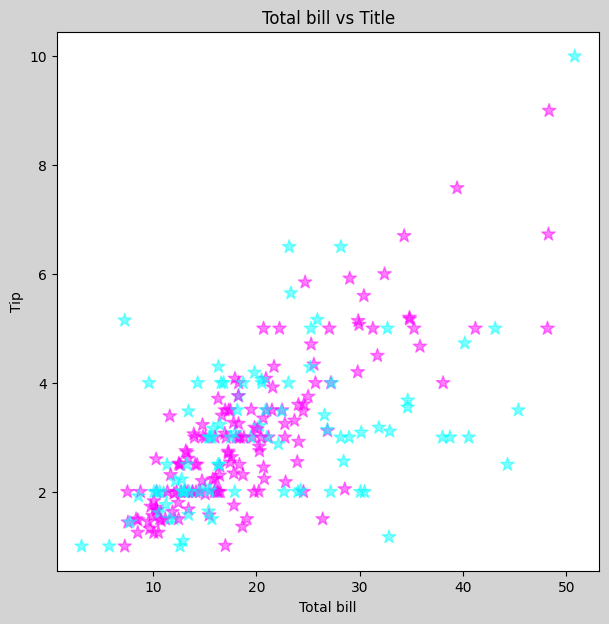

In [45]:
plt.figure(figsize=(7,7), facecolor='lightgrey')

x = np.array([tips['smoker'] == 'No'])
plt.scatter(tips['total_bill'], tips['tip'], marker='*',
             c = x, s = tips['size']+100, alpha=0.5, cmap = 'cool')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title('Total bill vs Title')
plt.show()

#### **bar plot**

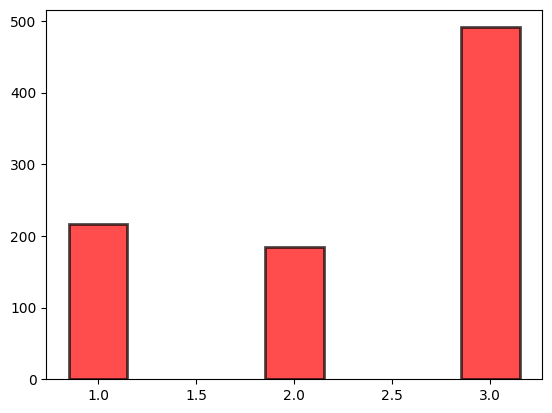

In [46]:
# number of classes of people in titanic ship

classes = titanic['Pclass'].value_counts().reset_index()

plt.bar(classes['Pclass'], classes['count'], edgecolor = 'k', alpha = 0.7, facecolor = 'r',
        linewidth = 2, width=0.3)
plt.show()

#### **stem plot**

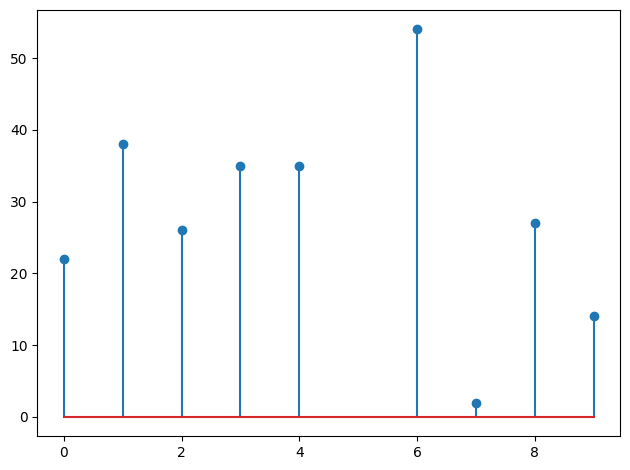

In [47]:
x = np.arange(10)
plt.stem(x, titanic['Age'][:10])
plt.tight_layout()
plt.show()

#### **fill_between()**

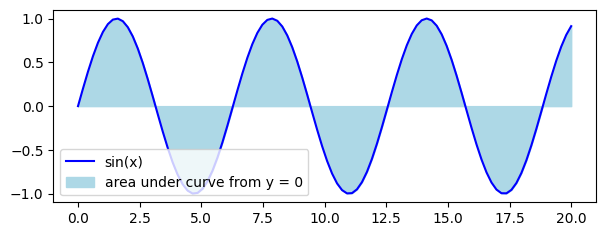

In [48]:
x = np.linspace(0,20,100)
y = np.sin(x)

plt.figure(figsize=(7,2.5))
plt.plot(x,y, label = 'sin(x)', color = 'blue')
plt.fill_between(x,y,0, color = 'lightblue', label = 'area under curve from y = 0')
plt.legend()
plt.show()

#### **Stackplot**

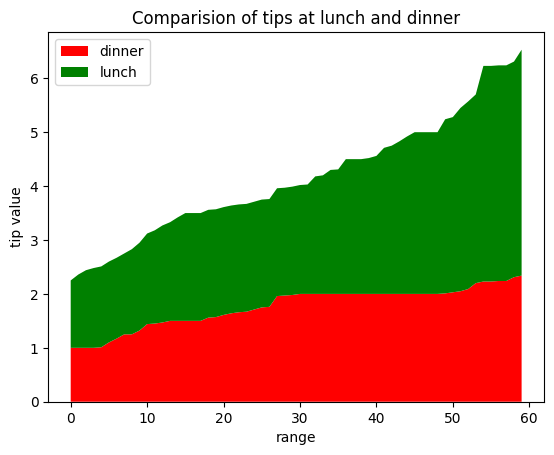

In [49]:
tips_dinner = tips[tips['time'] == 'Dinner'].sort_values('tip')
tips_lunch = tips[tips['time'] == 'Lunch'].sort_values('tip')


plt.stackplot(np.arange(60),tips_dinner['tip'][:60], tips_lunch['tip'][:60],
              colors=['r','g'], labels=['dinner', 'lunch'])
plt.legend()
plt.xlabel('range')
plt.ylabel('tip value')
plt.title('Comparision of tips at lunch and dinner')
plt.show()

#### **stairs**

In [50]:
## Age of a person with id '77710' over the different years

person = athletes[athletes['ID'] == 77710].sort_values('Year')

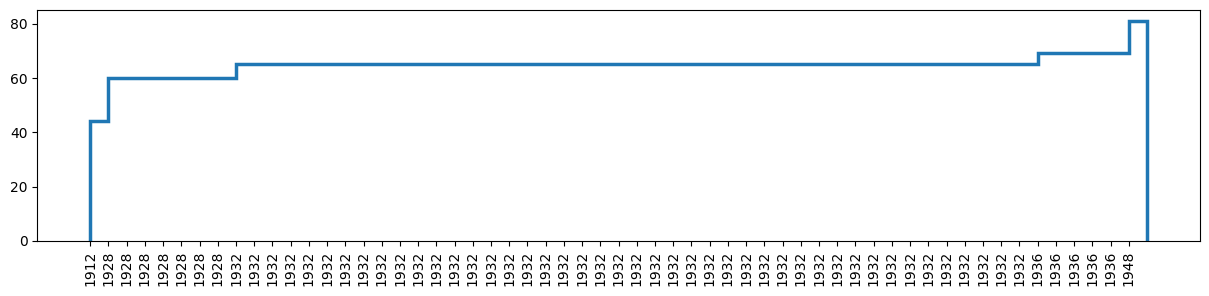

In [51]:
plt.figure(figsize=(15,3))
plt.stairs(person['Age'], linewidth = 2.5)
plt.xticks(np.arange(58), person['Year'], rotation = 90)
plt.show()

### **Statistical plots**

#### **hist plot**

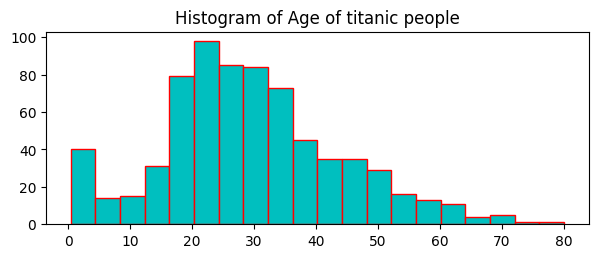

In [52]:
# age distributon in titanic data

plt.figure(figsize=(7,2.5))
plt.hist(titanic['Age'], facecolor = 'c', edgecolor = 'r', bins=20)
plt.title('Histogram of Age of titanic people')
plt.show()

#### **box plot**

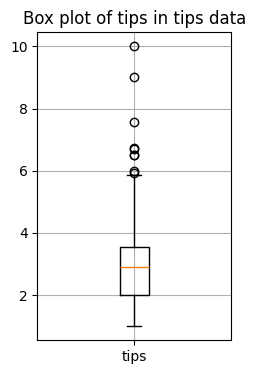

In [53]:
# Observing the outliers in tips of tips dataset

plt.figure(figsize=(2.5, 4))
plt.boxplot(tips['tip'])
plt.title('Box plot of tips in tips data')
plt.xticks([1],['tips'])
plt.grid()
plt.show()


#### **errorbar**

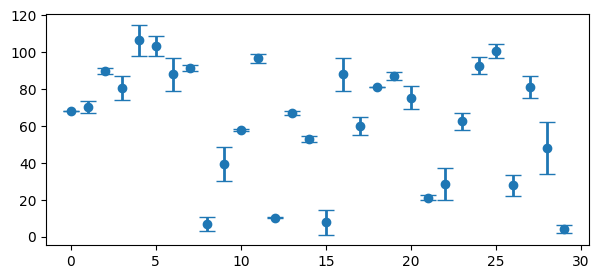

In [54]:
np.random.seed(62)

x = np.arange(30)
err = np.abs(np.random.randn(30))*5.9
y = np.random.randint(0, 100, 30) + err

plt.figure(figsize=(7, 3))
plt.errorbar(x,y,err, fmt = 'o', linewidth = 2, capsize=6)
plt.show()


#### **violin plot**

In [ ]:
athletes_no_null = athletes.dropna()
titanic_no_null = titanic.dropna()

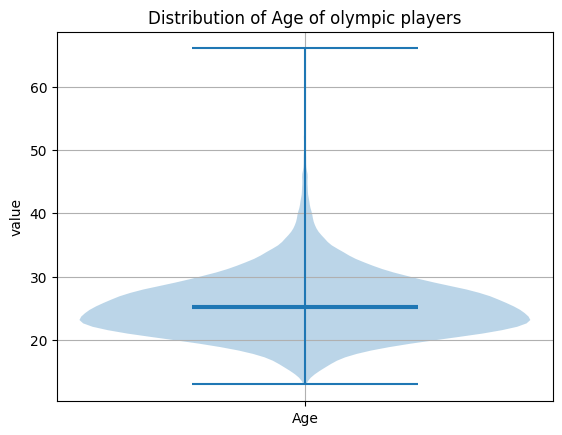

In [72]:
plt.violinplot(athletes_no_null['Age'], showmedians=True, showmeans=True)
plt.ylabel('value')
plt.xticks([1], ['Age'])
plt.grid(True)
plt.title("Distribution of Age of olympic players")
plt.show()

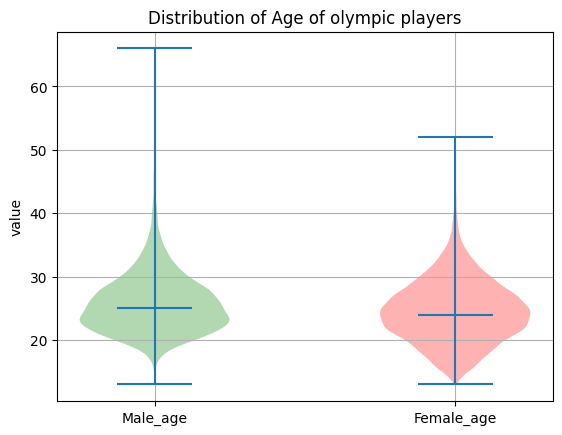

In [ ]:
# distrubution of age, based on gender

olymp_f_ages = athletes_no_null[athletes_no_null['Sex'] == 'F']['Age']
olymp_m_ages = athletes_no_null[athletes_no_null['Sex'] == 'M']['Age']

color = ['green','red']

data = [olymp_m_ages, olymp_f_ages]
violin = plt.violinplot(data, showmedians=True, positions=[1,2])

i = 0
for body in violin['bodies']:
    body.set_facecolor(color[i])
    i+=1

plt.ylabel('value')
plt.xticks([1,2], ['Male_age', "Female_age"])
plt.grid(True)
plt.title("Distribution of Age of olympic players")
plt.show()

#### **event plot()**

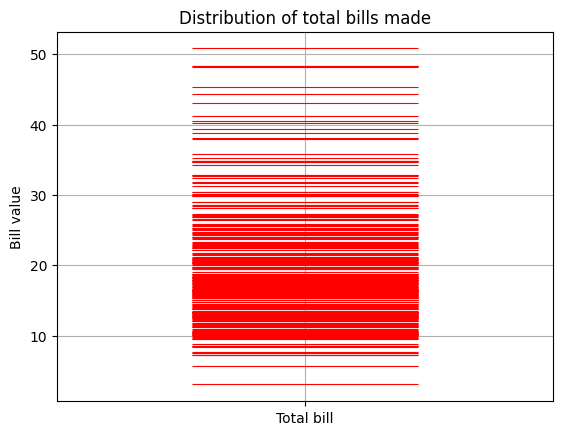

In [82]:
plt.eventplot(tips['total_bill'], linewidths=0.8, color = 'r', orientation='vertical')
plt.ylabel('Bill value')
plt.xticks([1], ['Total bill'])
plt.grid(True)  
plt.title("Distribution of total bills made")
plt.show()

#### **hist2d**

Distribution of histograms accross 2 variables

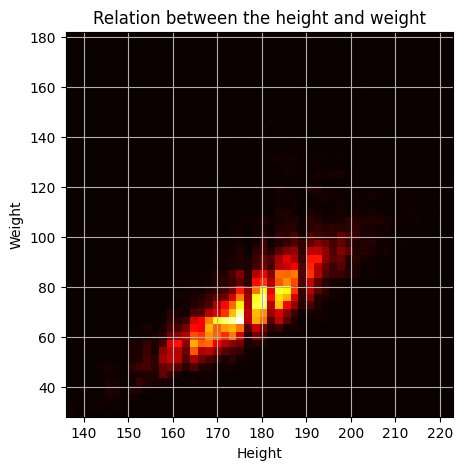

In [92]:
# hist2d of height and weight in olympics data

plt.figure(figsize=(5,5))
plt.hist2d(athletes_no_null['Height'], athletes_no_null['Weight'] ,bins = 50, cmap = 'hot')
plt.ylabel('Weight')
plt.xlabel('Height')
plt.grid(True)  
plt.title("Relation between the height and weight")
plt.show()


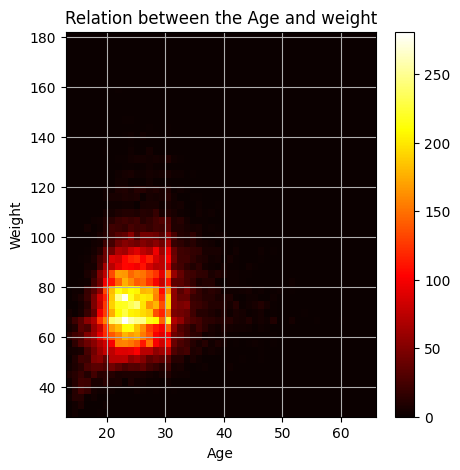

In [101]:
# relation between age and weight of athletes

plt.figure(figsize=(5,5))
plt.hist2d(athletes_no_null['Age'], athletes_no_null['Weight'] ,bins = 50, cmap = 'hot')
plt.ylabel('Weight')
plt.xlabel('Age')
plt.grid(True)  
plt.title("Relation between the Age and weight")
plt.colorbar()
plt.show()

#### **hexbin()**

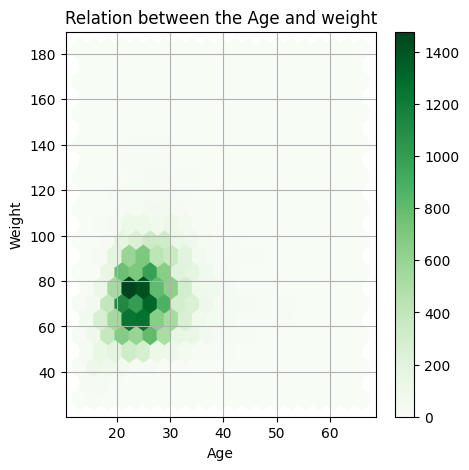

In [100]:
plt.figure(figsize=(5,5))
plt.hexbin(athletes_no_null['Age'], athletes_no_null['Weight'], gridsize=20, cmap='Greens')
plt.ylabel('Weight')
plt.xlabel('Age')
plt.grid(True)  
plt.colorbar()
plt.title("Relation between the Age and weight")
plt.show()

#### **Pie plot**

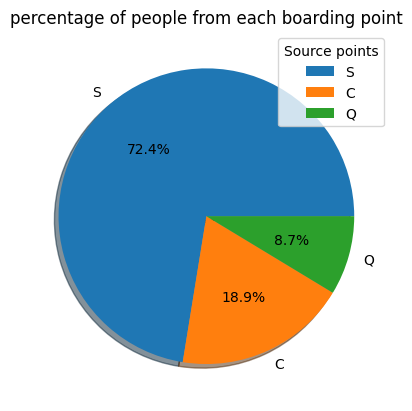

In [106]:
# comparision on count of people from each boarding point in 

source_count = titanic['Embarked'].value_counts().reset_index()

plt.pie(source_count['count'], labels=source_count['Embarked'], shadow=True, autopct='%1.1f%%')
plt.legend(title = 'Source points')
plt.title("percentage of people from each boarding point")
plt.show()



#### **ecdf plot**

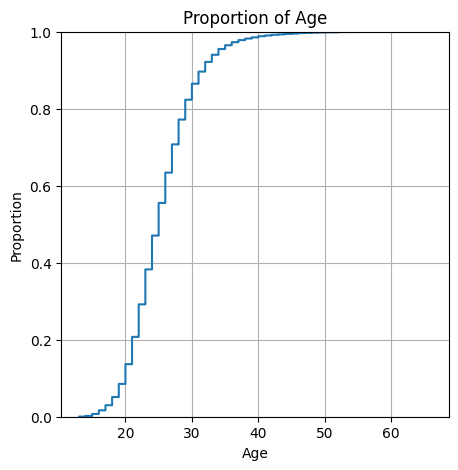

In [108]:
# ECDF plot of weight of people in olympics

plt.figure(figsize=(5,5))
plt.ecdf(athletes_no_null['Age'])
plt.ylabel('Proportion')
plt.xlabel('Age')
plt.grid(True)  
plt.title("Proportion of Age")
plt.show()


### **Gridded data**

#### **imshow()**

In [109]:
from PIL import Image
import numpy as np

In [110]:
girl = np.array(Image.open('girl.jpg'))
print(girl.shape)

(419, 612, 3)


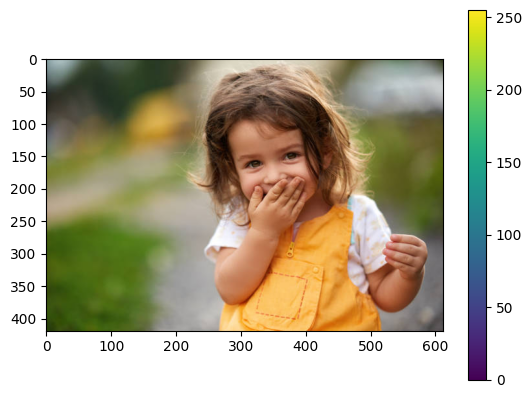

In [113]:
plt.imshow(girl)
plt.colorbar()
plt.show()

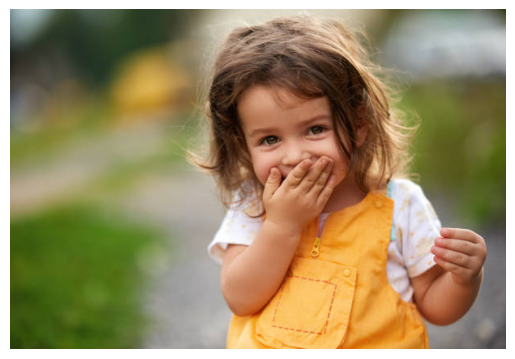

In [118]:
plt.imshow(girl)
plt.axis('off')
plt.show()

#### **pcolormesh()**

The pcolormesh() function in pyplot module of matplotlib library is used to create a pseudocolor plot with a non-regular rectangular grid

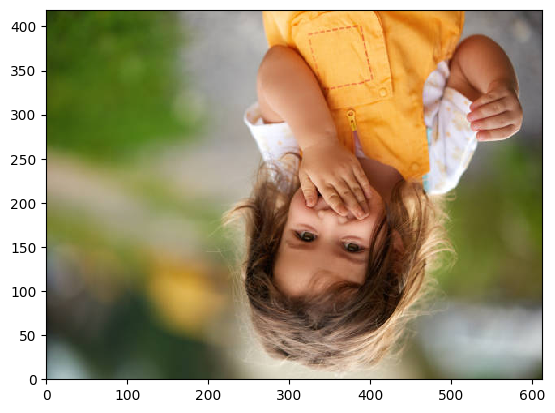

In [119]:
plt.pcolormesh(girl)
plt.show()

#### **contour plot**

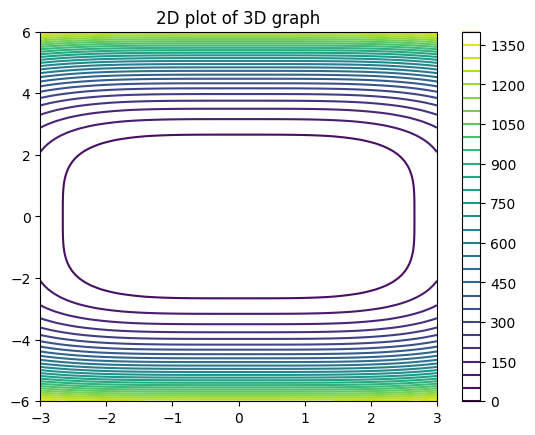

In [128]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)*2
X, Y = np.meshgrid(x,y)


plt.contour(X, Y, X**4 + Y**4, levels = 30)
plt.colorbar()
plt.title("2D plot of 3D graph")
plt.show()

#### **contourf()**

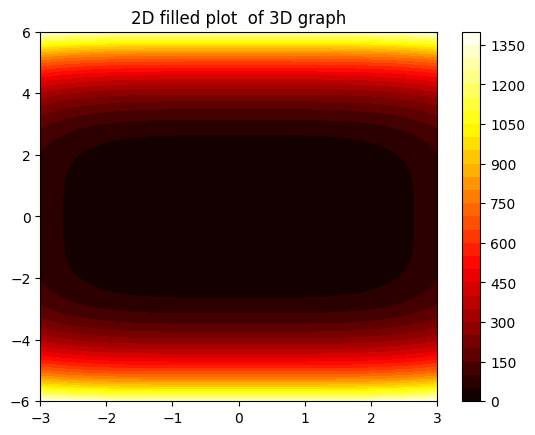

In [127]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)*2
X, Y = np.meshgrid(x,y)


plt.contourf(X, Y, X**4 + Y**4, levels = 30, cmap = 'hot')
plt.colorbar()
plt.title("2D filled plot  of 3D graph")
plt.show()

### **3D plotting in matplotlib**

#### **3D grid view**

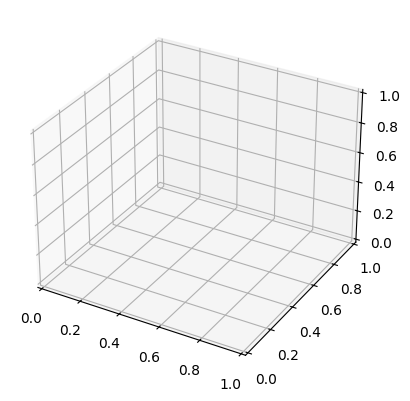

In [129]:
plt.figure()
ax = plt.axes(projection = '3d')
plt.show()

#### **3D line plot**

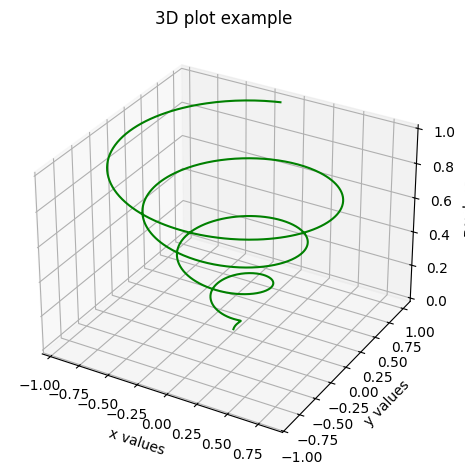

In [137]:
z = np.linspace(0, 1, 1000)
x = z * np.sin(25*z)
y = z * np.cos(25*z)


fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.plot3D(x,y,z, 'green')
ax.set_title('3D plot example')
ax.set_xlabel('x values')
ax.set_ylabel('y values')
ax.set_zlabel('z values')
plt.tight_layout()
plt.show()

#### **scatter plot**

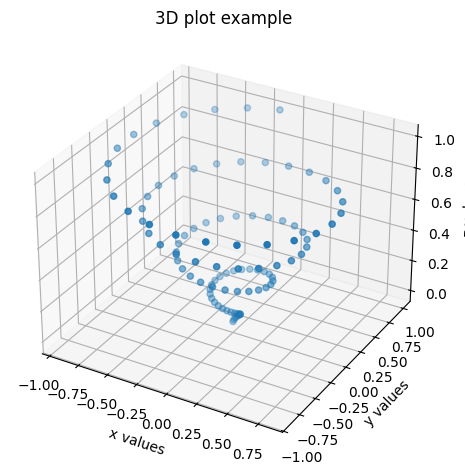

In [139]:
z = np.linspace(0, 1, 100)
x = z * np.sin(25*z)
y = z * np.cos(25*z)


fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.scatter3D(x,y,z, 'green')
ax.set_title('3D plot example')
ax.set_xlabel('x values')
ax.set_ylabel('y values')
ax.set_zlabel('z values')

plt.tight_layout()
plt.show()

#### **surface plot**

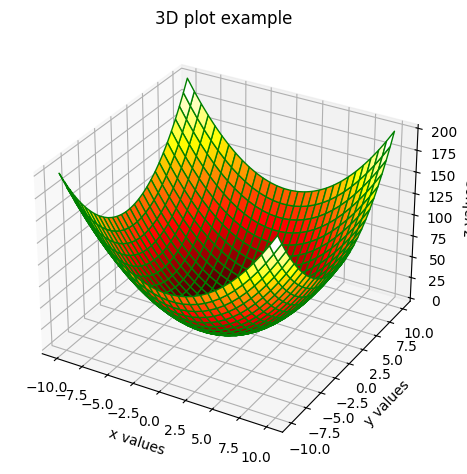

In [148]:
x = np.linspace(-10, 10, 30)
y = x.copy()

X, Y = np.meshgrid(x,y)
Z = X**2 + Y**2


fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.plot_surface(X, Y, Z, cmap = 'hot', edgecolor = 'green')
ax.set_title('3D plot example')
ax.set_xlabel('x values')
ax.set_ylabel('y values')
ax.set_zlabel('z values')
plt.tight_layout()
plt.show()

#### **wireframe plot**

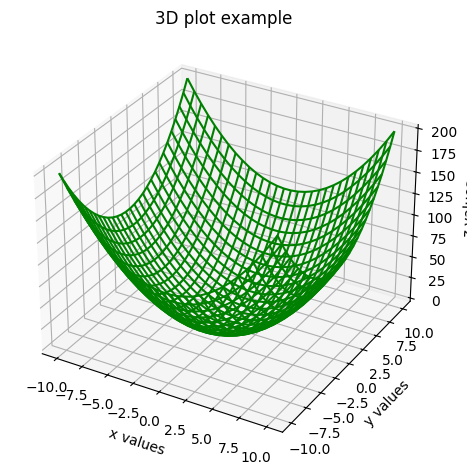

In [150]:
x = np.linspace(-10, 10, 30)
y = x.copy()

X, Y = np.meshgrid(x,y)
Z = X**2 + Y**2


fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.plot_wireframe(X, Y, Z, color = 'green')
ax.set_title('3D plot example')
ax.set_xlabel('x values')
ax.set_ylabel('y values')
ax.set_zlabel('z values')
plt.tight_layout()
plt.show()

#### **Bar plot 3D**

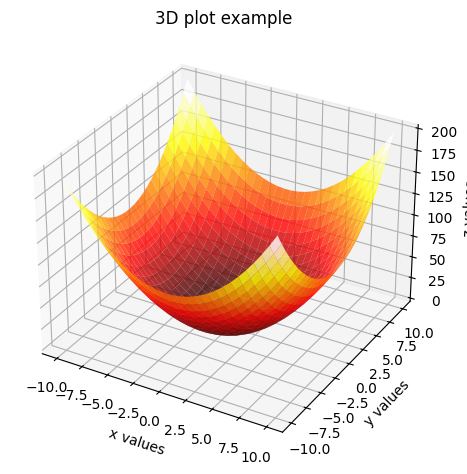

In [153]:
x = np.linspace(-10, 10, 30)
y = x.copy()

X, Y = np.meshgrid(x,y)
Z = X**2 + Y**2


fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.plot_surface(X, Y, Z, cmap = 'hot', alpha = 0.8)
ax.set_title('3D plot example')
ax.set_xlabel('x values')
ax.set_ylabel('y values')
ax.set_zlabel('z values')
plt.tight_layout()
plt.show()

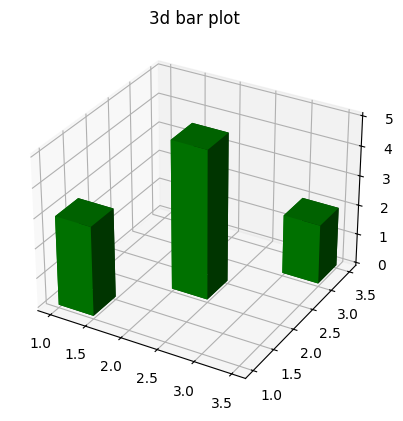

In [156]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x = [1, 2, 3]
y = [1, 2, 3]
z = [0, 0, 0]

dx = dy = [0.5, 0.5, 0.5]
dz = [3, 5, 2]

ax.bar3d(x, y, z, dx, dy, dz, color='green')
ax.set_title('3d bar plot')
plt.show()

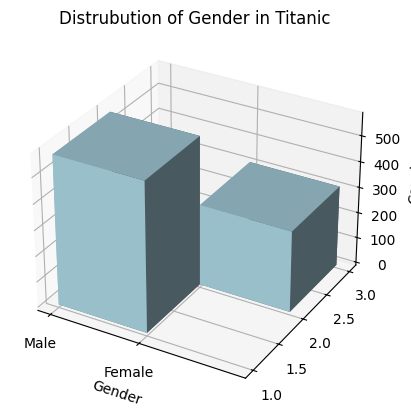

In [159]:
# bar3d for gender of titanic

counts = titanic['Sex'].value_counts()

labels = counts.index.tolist()
values = counts.values

x_pos = [1,2]
y_pos = [1,2]
z_pos = np.zeros_like(x_pos)

dx = dy = np.ones_like(x_pos)
dz = values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color='lightblue')
ax.set_title("Distrubution of Gender in Titanic")
ax.set_xlabel('Gender')
ax.set_zlabel('Count')

ax.set_xticks(x_pos, ['Male', "Female"])